<a id="top"></a> <br>
# Content for *Credit Card Default Prediction* 
1. [Introduction and Data Description](#1)
2. [Imports](#2)
   1. [Package Imports](#2)
   2. [Data Import](#2)
3. [Data Transformations and Exploration](#3)
   1. [Data Exploration](#3)
   2. [Data Transformation](#3)
4. [Methodology Overview](#4)
5. [Model Training/Validation](#5)
6. [Results](#6)
7. [Final Predictions on Test Set](#7)
8. [References](#8)

<a id="1"></a> <br>
## 1. Introduction and Data Description

In this study, I will need to build a model that predicts the value of the **default_payment_next_month** variable which can take the values {0,1} indicating no default or default.

My primary appoach for this study is to build a general ML workflow and then a collection of base ML models.

The data contains these features:

* ID: The client id
  * X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
  * X2: Gender (1 = male; 2 = female).
  * X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
  * X4: Marital status (1 = married; 2 = single; 3 = others).
  * X5: Age (year).
* X6 - X11: History of past payment: (The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)
  * X6 = the repayment status in September, 2005
  * X7 = the repayment status in August, 2005
  * X8 = the repayment status in July, 2005
  * X9 = the repayment status in June, 2005
  * X10 = the repayment status in May, 2005
  * X11 = the repayment status in April, 2005.
* X12-X17: Amount of bill statement: (NT dollar)
  * X12 = amount of bill statement in September, 2005
  * X13 = amount of bill statement in August, 2005
  * X14 = amount of bill statement in July, 2005
  * X15 = amount of bill statement in June, 2005
  * X16 = amount of bill statement in May, 2005
  * X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment: (NT dollar)
  * X18 = amount paid in September, 2005
  * X19 = amount paid in August, 2005
  * X20 = amount paid in July, 2005
  * X21 = amount paid in June, 2005
  * X22 = amount paid in May, 2005
  * X23 = amount paid in April, 2005
* Y: The default outcome (0: No default, 1: Default)


###### [Go to top](#top)

<a id="2"></a> <br>
## 2. Imports

<a id="2"></a> <br>
### 2.A. Package Imports

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score, auc, roc_curve
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network, naive_bayes, gaussian_process
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import model_selection, discriminant_analysis
import sklearn

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from math import sqrt
import seaborn as sns
import io

import sys
import csv
import os

import warnings
warnings.filterwarnings('ignore')

C:\Users\Muratoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Muratoz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Version controls:

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.2
sklearn: 0.19.1
seaborn: 0.8.1
pandas: 0.23.3
numpy: 1.15.1
Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [3]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 15,20
plt.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

<a id="2"></a> <br>
### 2.B. Data Import

In [4]:
train = pd.read_csv('CreditCard_train.csv', index_col= 0, header=1)
test = pd.read_csv('CreditCard_test.csv', index_col= 0, header=1)

In [5]:
train.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   

    PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID                    ...                                                
1      -2             ...                      0          0          0   
2       0             ...                   3272       3455       3261   
3       0             ...                  14331      14948      15549   
4       0             ...                  28314      28959      29547   
5       0             ...                  20940      19146      19131   

    PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                               
1          0       689         0         0         0         0   
2          0      1000      1000      1000         0      2000   
3       1518      1500      1000      1000      1000      5000   
4       2000      2019      1200      1100      1069      1000   
5       2000     36681     10000      9000       689       679   

    default payment next month  
ID                              
1                            1  
2                            1  
3                            0  
4                            0  
5                            0  

[5 rows x 24 columns]

In [6]:
test.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
24001      50000    1          2         2   23      2      2      0      0   
24002      60000    1          2         2   26      0      0      0      0   
24003     400000    1          2         2   27      0      0      0      0   
24004      20000    1          5         2   27      5      4      3      2   
24005      50000    1          3         2   27      0      0     -2     -2   

       PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID                       ...                                                
24001      0             ...                  44116      21247      20066   
24002      0             ...                  55736      26958      28847   
24003      0             ...                  10745      20737       9545   
24004      2             ...                  19709      20113      19840   
24005     -1             ...                      0         70        120   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                  
24001         8      2401      2254      2004       704       707   
24002      2282      2324      2049      2000      3000      1120   
24003      2501     10009      1437      1105       510       959   
24004         0         0         0       900         0         0   
24005         0       100         0        70       200       100   

       default payment next month  
ID                                 
24001                           0  
24002                           1  
24003                           0  
24004                           0  
24005                           0  

[5 rows x 24 columns]

###### [Go to top](#top)

<a id="3"></a> <br>
## 3. Data Transformations and Exploration

<a id="3"></a> <br>
### 3.A. Data Exploration

* Data types

In [7]:
train.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

It looks like categoric variables are all numeric types. Convert them into categoric types:

In [8]:
cats = ['SEX', 'EDUCATION', 'MARRIAGE']                      

In [9]:
# loop to change each column to category
for col in cats:
    train[col] = train[col].astype('category', copy=False)

In [10]:
train.dtypes

LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month       int64
dtype: object

In [11]:
# do the same for the test set
# loop to change each column to category
for col in cats:
    test[col] = test[col].astype('category', copy=False)

In [12]:
test.dtypes

LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month       int64
dtype: object

* Describe the data

In [13]:
train.describe()

LIMIT_BAL           AGE         PAY_0        PAY_2         PAY_3  \
count    24000.000000  24000.000000  24000.000000  24000.00000  24000.000000   
mean    165495.986667     35.380458     -0.003125     -0.12350     -0.154750   
std     129128.744855      9.271050      1.123425      1.20058      1.204033   
min      10000.000000     21.000000     -2.000000     -2.00000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.00000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.00000      0.000000   
75%     240000.000000     41.000000      0.000000      0.00000      0.000000   
max    1000000.000000     79.000000      8.000000      8.00000      8.000000   

              PAY_4         PAY_5         PAY_6      BILL_AMT1      BILL_AMT2  \
count  24000.000000  24000.000000  24000.000000   24000.000000   24000.000000   
mean      -0.211667     -0.252917     -0.278000   50596.884708   48646.064125   
std        1.166549      1.136993      1.158169   72649.374256   70364.600436   
min       -2.000000     -2.000000     -2.000000 -165580.000000  -69777.000000   
25%       -1.000000     -1.000000     -1.000000    3631.500000    3098.500000   
50%        0.000000      0.000000      0.000000   22330.000000   21339.000000   
75%        0.000000      0.000000      0.000000   65779.500000   62761.250000   
max        8.000000      8.000000      8.000000  964511.000000  983931.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               24000.000000   24000.000000   
mean              ...               42368.188417   40000.682542   
std               ...               63070.680934   60345.012766   
min               ...             -170000.000000  -81334.000000   
25%               ...                2340.000000    1740.000000   
50%               ...               18940.500000   18107.500000   
75%               ...               52188.500000   49746.500000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   24000.000000   24000.000000  2.400000e+04   24000.00000   
mean    38563.710625    5542.912917  5.815336e+03    4969.26600   
std     59155.759799   15068.576072  2.079703e+04   16095.61434   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1234.750000    1000.000000  8.000000e+02     379.00000   
50%     17036.000000    2100.000000  2.000000e+03    1702.50000   
75%     48796.250000    5000.000000  5.000000e+03    4347.25000   
max    961664.000000  505000.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count   24000.000000   24000.000000   24000.000000                24000.000000  
mean     4743.480042    4783.486042    5189.399042                    0.223750  
std     14883.269990   15270.405279   17630.371990                    0.416765  
min         0.000000       0.000000       0.000000                    0.000000  
25%       279.750000     244.000000      60.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4000.000000    4005.000000    4000.000000                    0.000000  
max    497000.000000  417990.000000  528666.000000                    1.000000  

[8 rows x 21 columns]

In [14]:
test.describe()

LIMIT_BAL          AGE       PAY_0        PAY_2       PAY_3  \
count    6000.000000  6000.000000  6000.00000  6000.000000  6000.00000   
mean   175437.666667    35.905667    -0.07100    -0.174833    -0.21200   
std    131905.841315     8.990675     1.12376     1.182723     1.16674   
min     10000.000000    21.000000    -2.00000    -2.000000    -2.00000   
25%     60000.000000    29.000000    -1.00000    -1.000000    -1.00000   
50%    150000.000000    34.000000     0.00000     0.000000     0.00000   
75%    250000.000000    42.000000     0.00000     0.000000     0.00000   
max    780000.000000    75.000000     8.00000     7.000000     8.00000   

             PAY_4        PAY_5       PAY_6      BILL_AMT1      BILL_AMT2  \
count  6000.000000  6000.000000  6000.00000    6000.000000    6000.000000   
mean     -0.256667    -0.319333    -0.34350   53729.115667   51311.119333   
std       1.178850     1.116348     1.11522   77411.882245   74290.225276   
min      -2.000000    -2.000000    -2.00000  -11545.000000  -67526.000000   
25%      -1.000000    -1.000000    -1.00000    3213.000000    2578.500000   
50%       0.000000     0.000000     0.00000   22820.000000   20814.500000   
75%       0.000000     0.000000     0.00000   71456.500000   68612.250000   
max       7.000000     7.000000     7.00000  746814.000000  671563.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...                6000.000000    6000.000000   
mean              ...               46841.991167   41554.274667   
std               ...               69041.251707   62562.774782   
min               ...              -65167.000000  -61372.000000   
25%               ...                2290.750000    1900.000000   
50%               ...               19657.000000   18071.500000   
75%               ...               61357.750000   52099.000000   
max               ...              706864.000000  587067.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count    6000.000000    6000.000000  6.000000e+03    6000.000000   
mean    40103.959500    6146.250833  6.344473e+03    6251.343500   
std     61111.043232   21523.044734  3.040158e+04   22638.732479   
min   -209051.000000       0.000000  0.000000e+00       0.000000   
25%      1320.000000    1000.000000  9.900000e+02     799.750000   
50%     17203.500000    2195.500000  2.230000e+03    2000.000000   
75%     50620.500000    5188.750000  5.042250e+03    5000.000000   
max    514975.000000  873552.000000  1.227082e+06  889043.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count    6000.000000    6000.000000    6000.000000                 6000.000000  
mean     5156.464167    4862.994000    5319.916667                    0.211000  
std     18466.518562   15310.976004   18355.191015                    0.408052  
min         0.000000       0.000000       0.000000                    0.000000  
25%       326.000000     278.750000     288.750000                    0.000000  
50%      1634.500000    1590.000000    1697.000000                    0.000000  
75%      4209.500000    4145.000000    4300.000000                    0.000000  
max    621000.000000  426529.000000  443001.000000                    1.000000  

[8 rows x 21 columns]

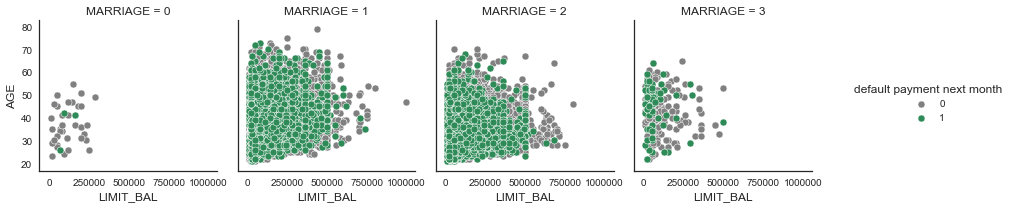

In [15]:
# realtionship between numeric variables
g = sns.FacetGrid(train, hue="default payment next month", col = "MARRIAGE", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "LIMIT_BAL", "AGE", edgecolor="w").add_legend()

<Figure size 432x288 with 0 Axes>

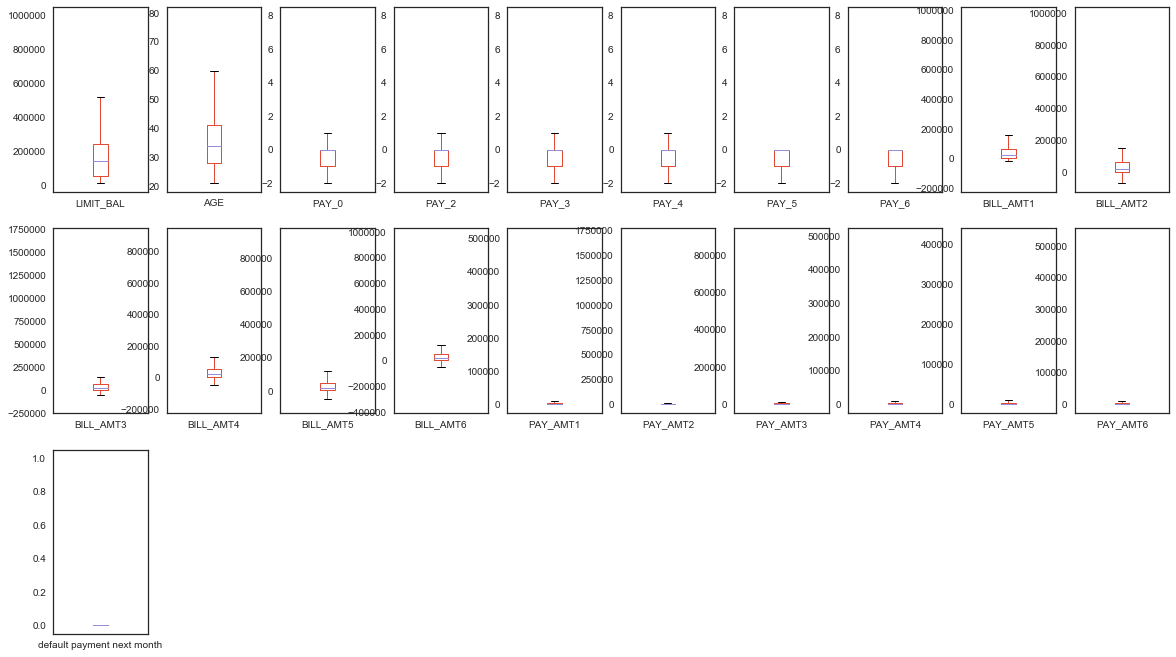

<Figure size 432x288 with 0 Axes>

In [16]:
train.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(20,40))
plt.figure()

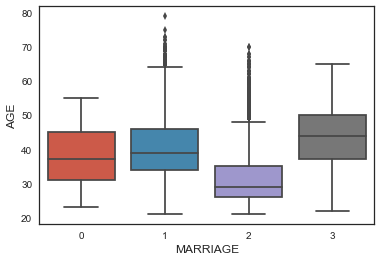

In [17]:
sns.boxplot(x="MARRIAGE", y="AGE", data=train)
plt.show()

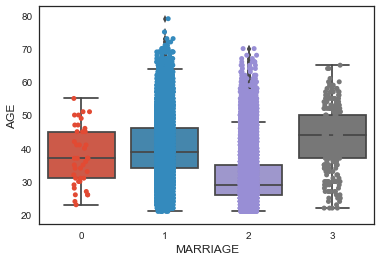

In [18]:
ax= sns.boxplot(x="MARRIAGE", y="AGE", data=train)
ax= sns.stripplot(x="MARRIAGE", y="AGE", data=train, jitter=True, edgecolor="gray")
plt.show()

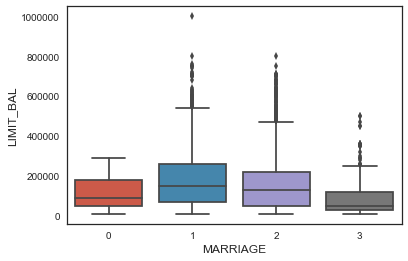

In [19]:
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=train)
plt.show()

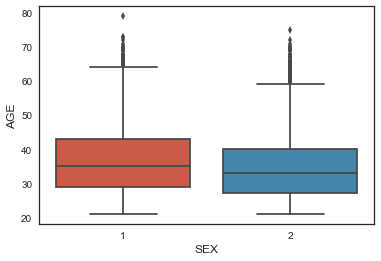

In [20]:
sns.boxplot(x="SEX", y="AGE", data=train)
plt.show()

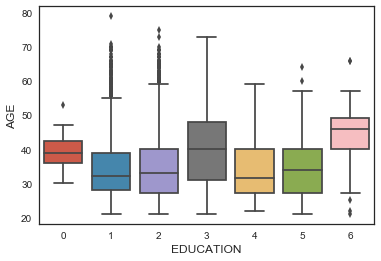

In [21]:
sns.boxplot(x="EDUCATION", y="AGE", data=train)
plt.show()

<Figure size 432x288 with 0 Axes>

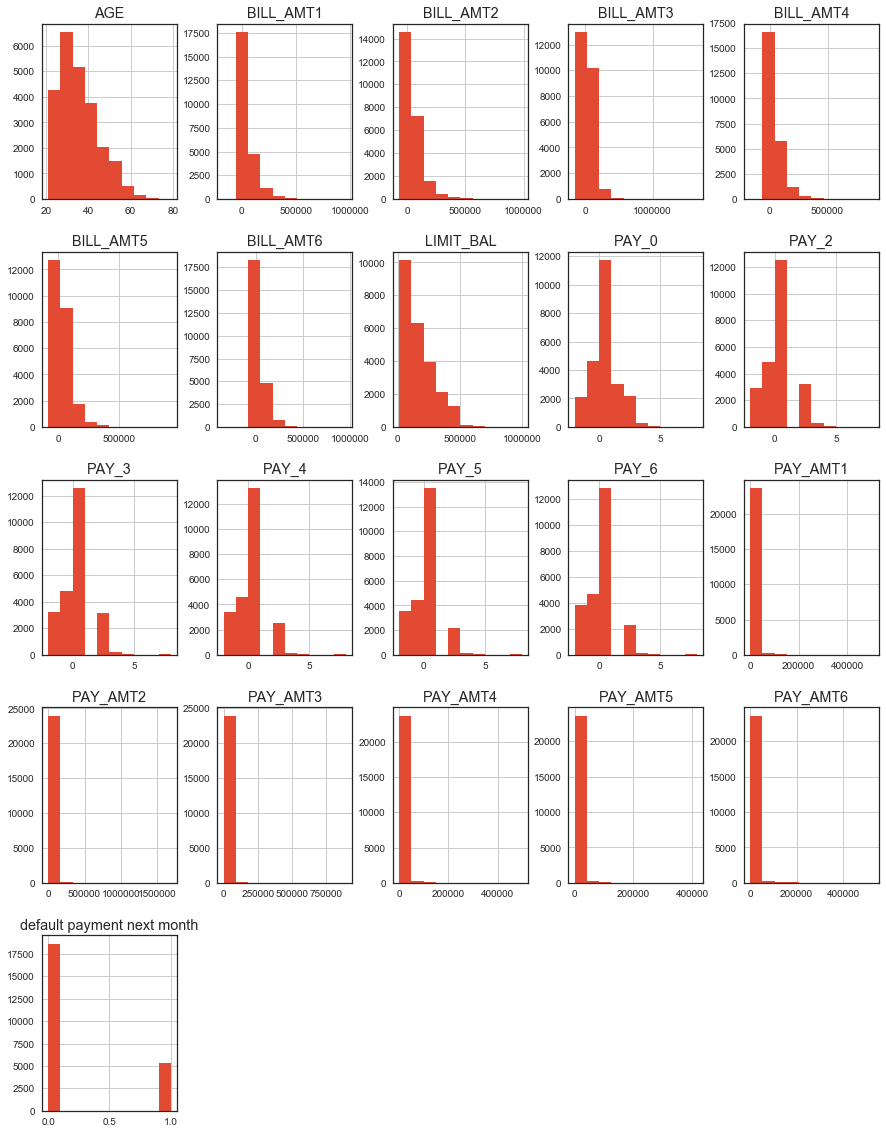

<Figure size 432x288 with 0 Axes>

In [22]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

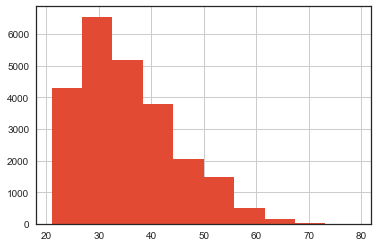

In [23]:
train['AGE'].hist()

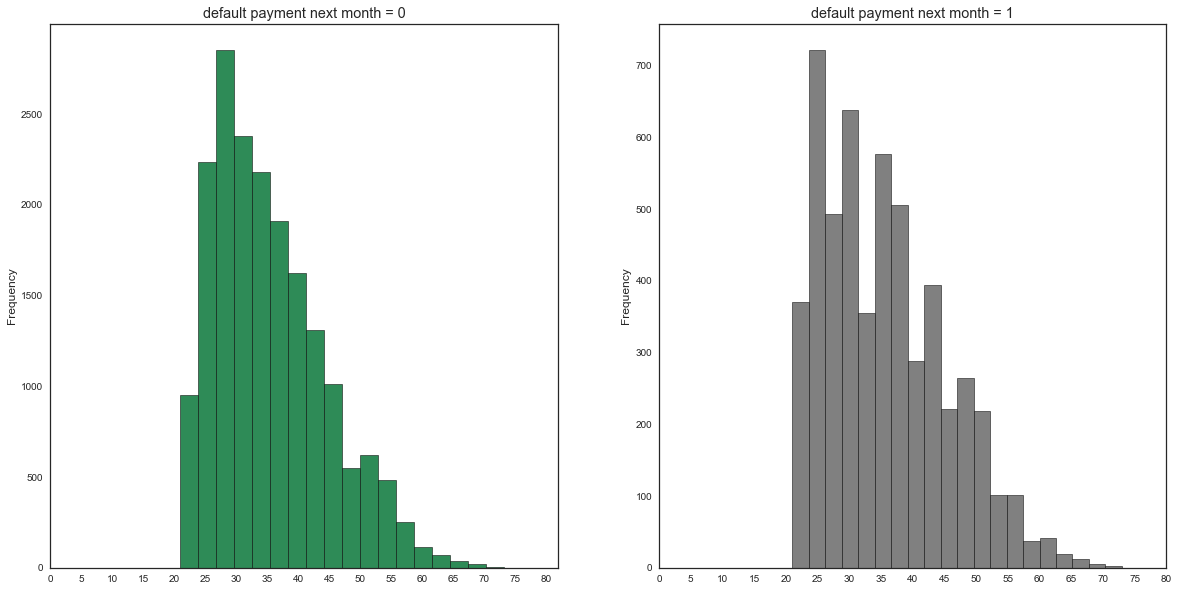

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['default payment next month']==0].AGE.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='seagreen')
ax[0].set_title('default payment next month = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['default payment next month']==1].AGE.plot.hist(ax=ax[1],color='gray',bins=20,edgecolor='black')
ax[1].set_title('default payment next month = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

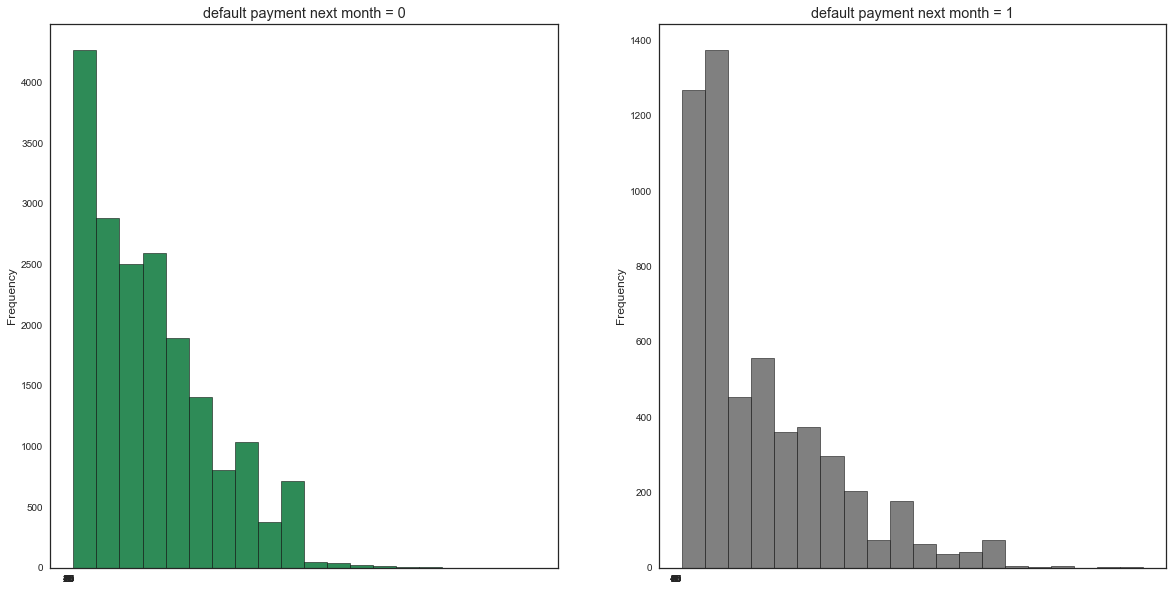

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['default payment next month']==0].LIMIT_BAL.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='seagreen')
ax[0].set_title('default payment next month = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['default payment next month']==1].LIMIT_BAL.plot.hist(ax=ax[1],color='gray',bins=20,edgecolor='black')
ax[1].set_title('default payment next month = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

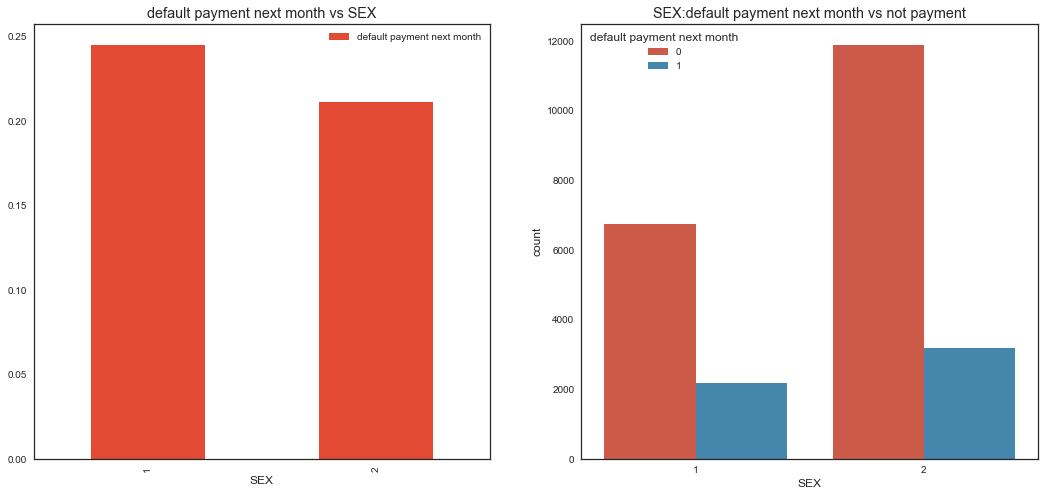

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['SEX','default payment next month']].groupby(['SEX']).mean().plot.bar(ax=ax[0])
ax[0].set_title('default payment next month vs SEX')
sns.countplot('SEX',hue='default payment next month',data=train,ax=ax[1])
ax[1].set_title('SEX:default payment next month vs not payment')
plt.show()

<Figure size 432x288 with 0 Axes>

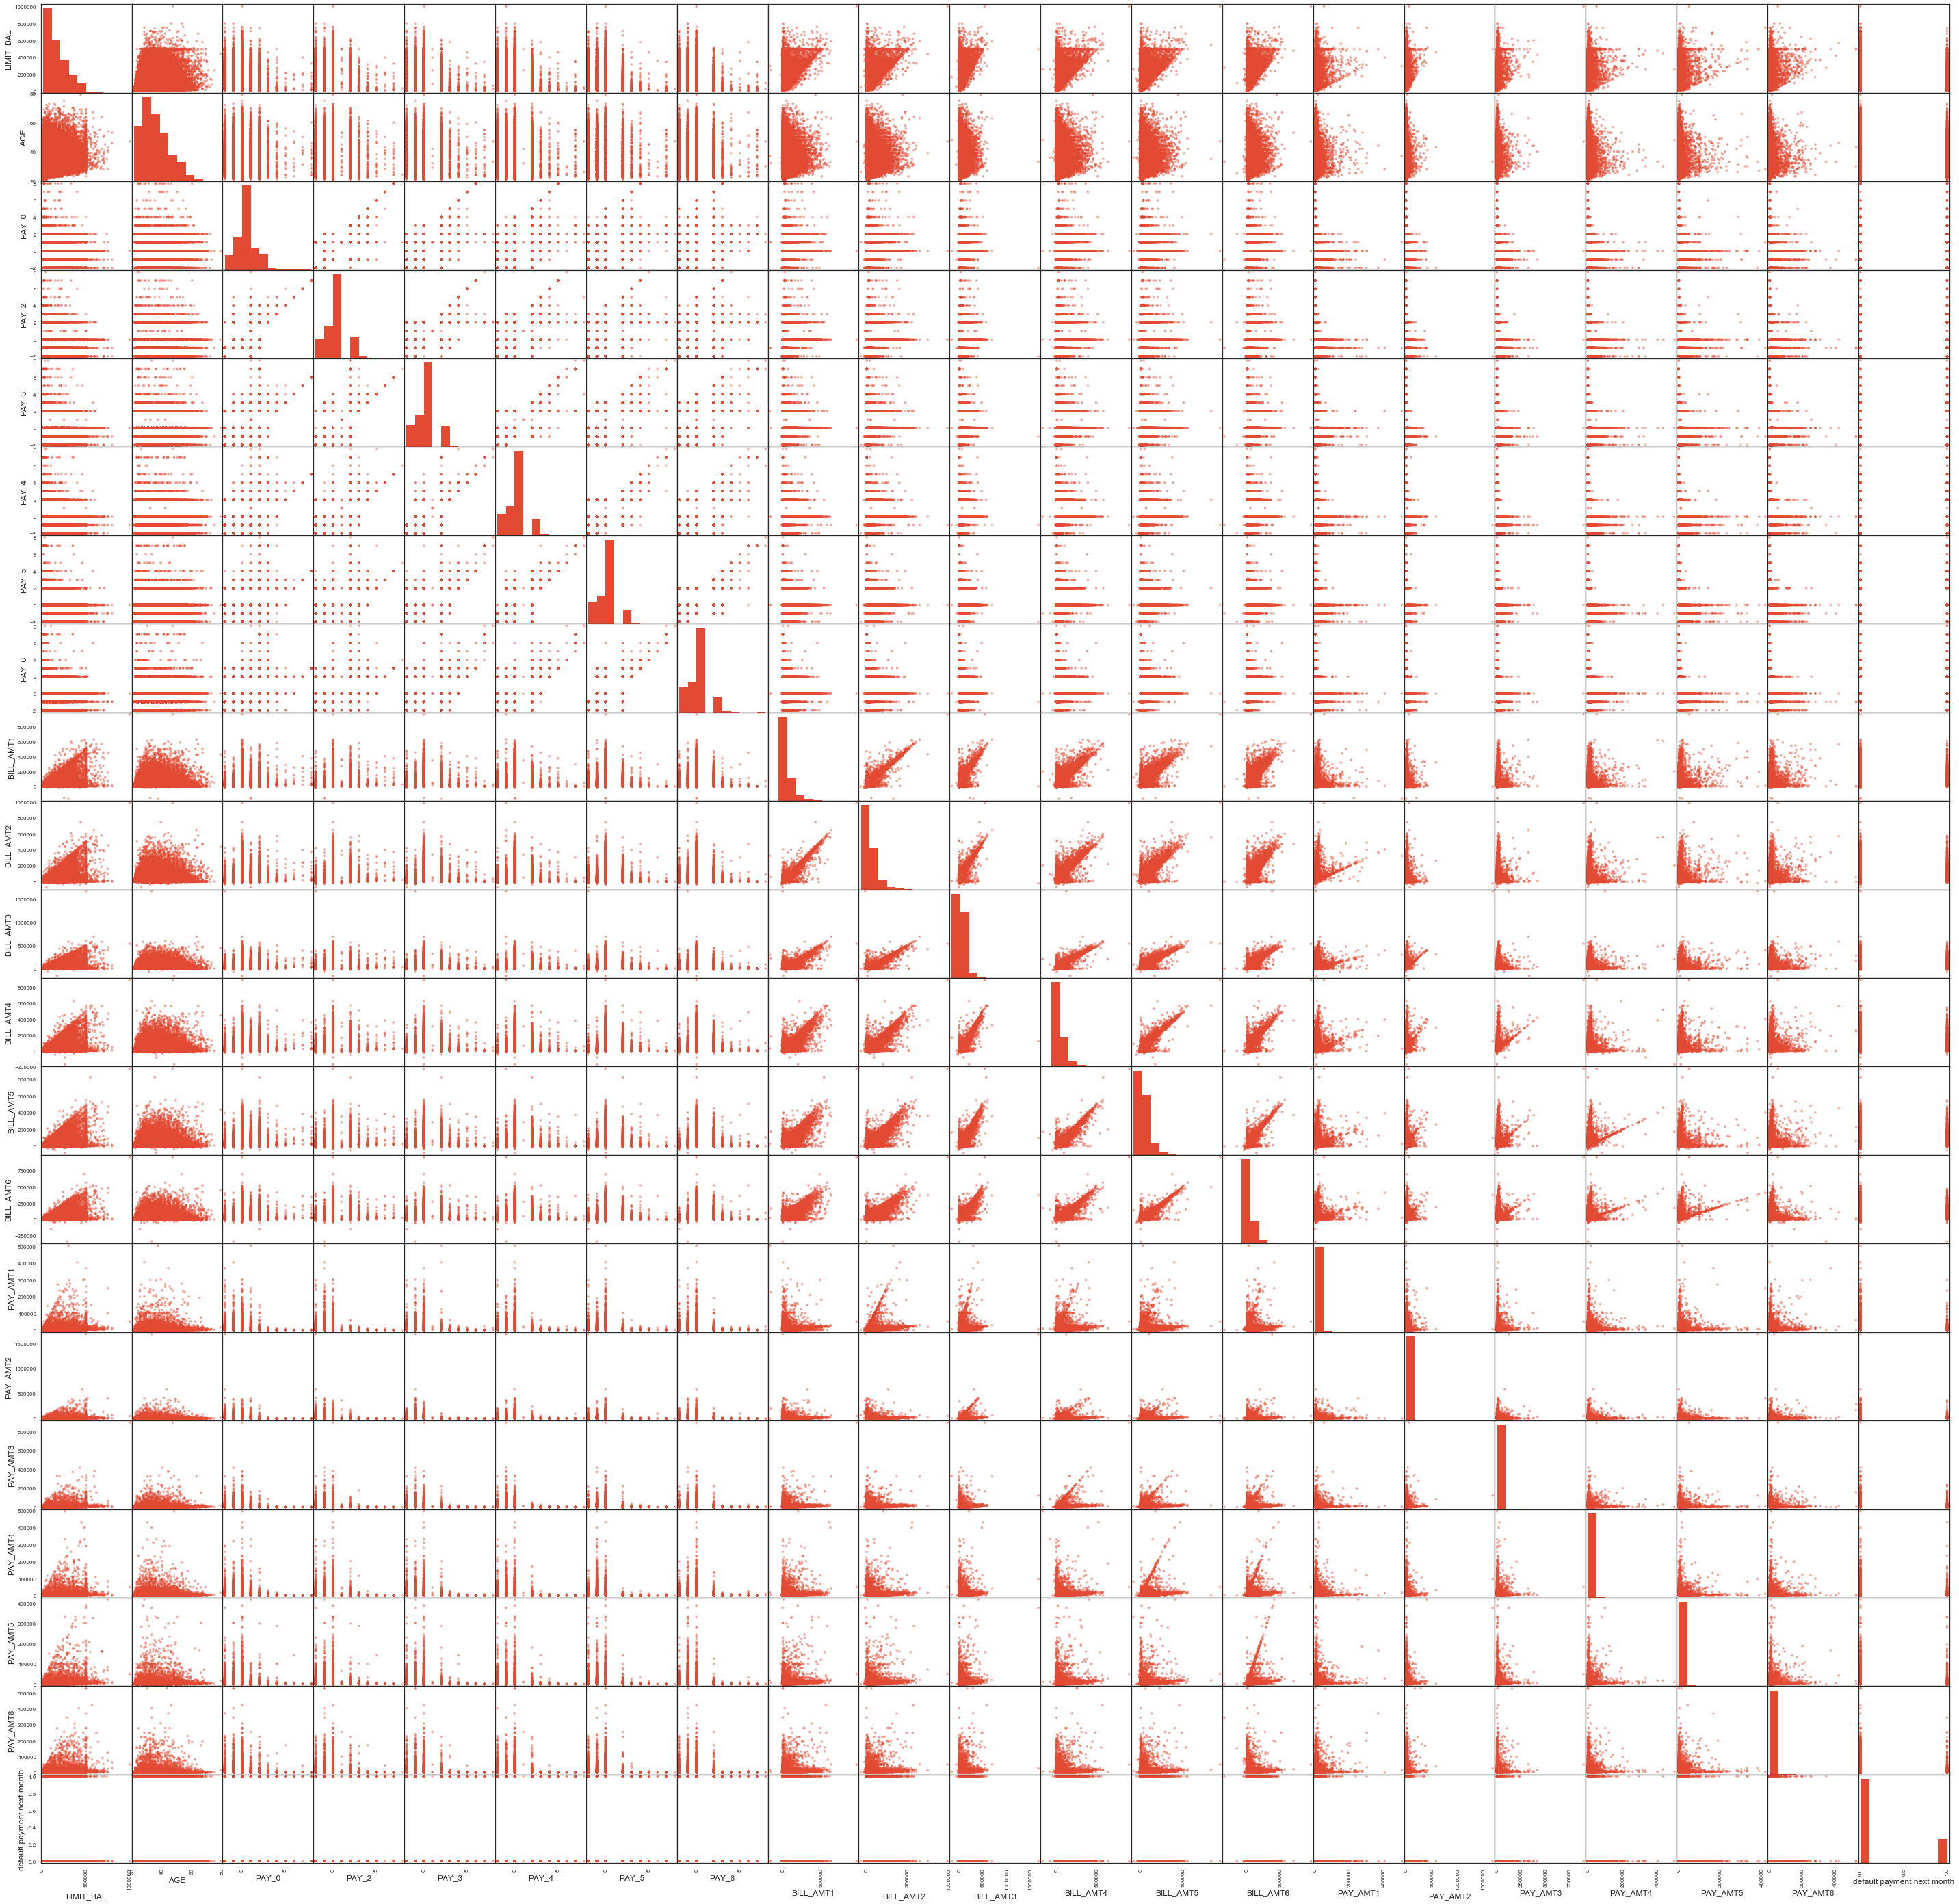

<Figure size 432x288 with 0 Axes>

In [28]:
# scatter plot matrix
pd.plotting.scatter_matrix(train,figsize=(50,50))
plt.figure()

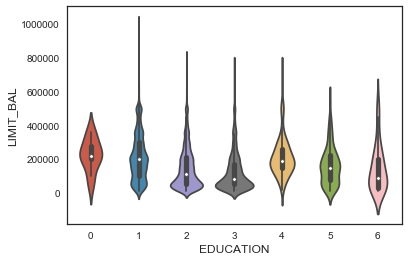

In [27]:
# violinplots 
sns.violinplot(data=train,x="EDUCATION", y="LIMIT_BAL")

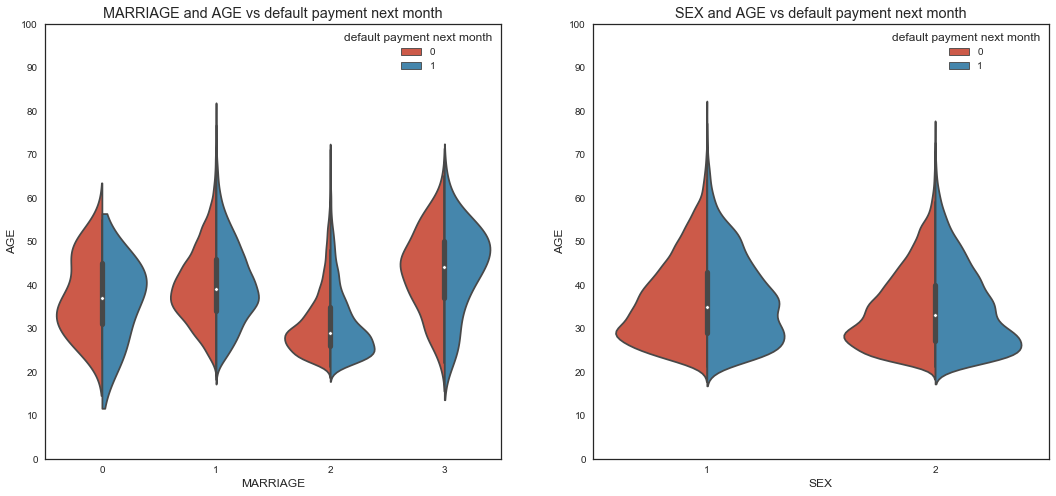

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("MARRIAGE","AGE", hue="default payment next month", data=train,split=True,ax=ax[0])
ax[0].set_title('MARRIAGE and AGE vs default payment next month')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("SEX","AGE", hue="default payment next month", data=train,split=True,ax=ax[1])
ax[1].set_title('SEX and AGE vs default payment next month')
ax[1].set_yticks(range(0,110,10))
plt.show()

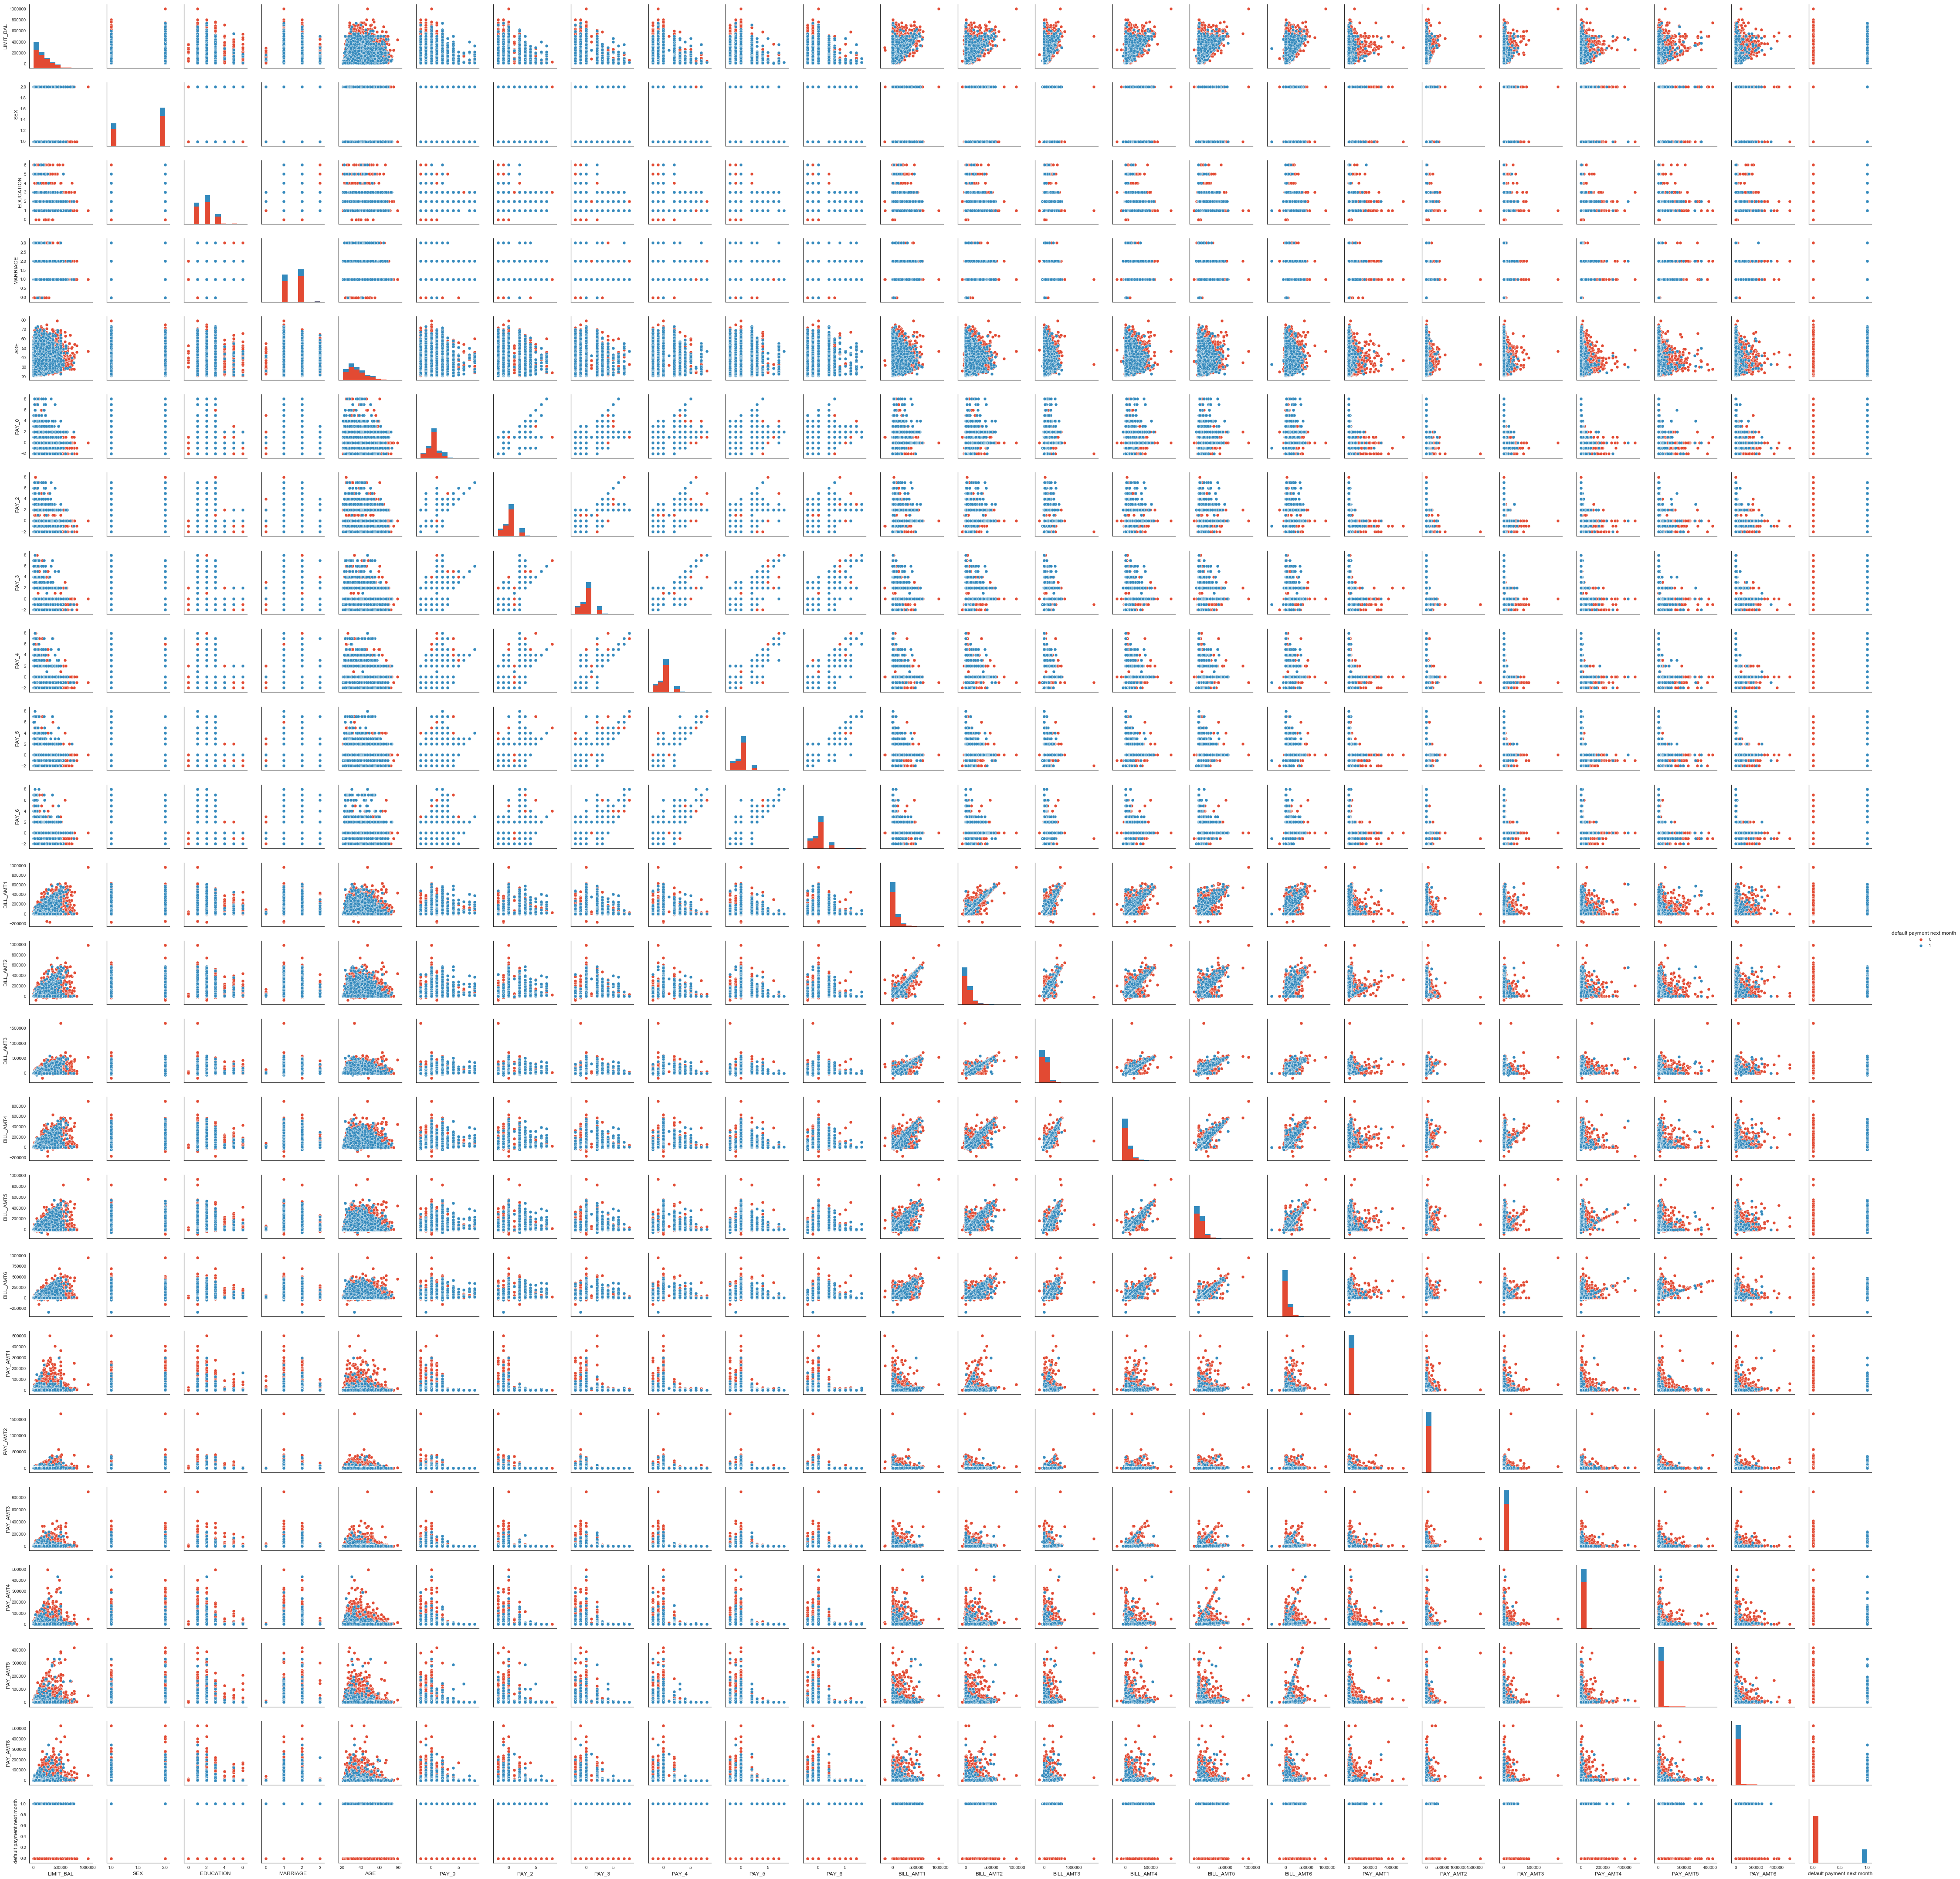

In [31]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(train, hue="default payment next month")

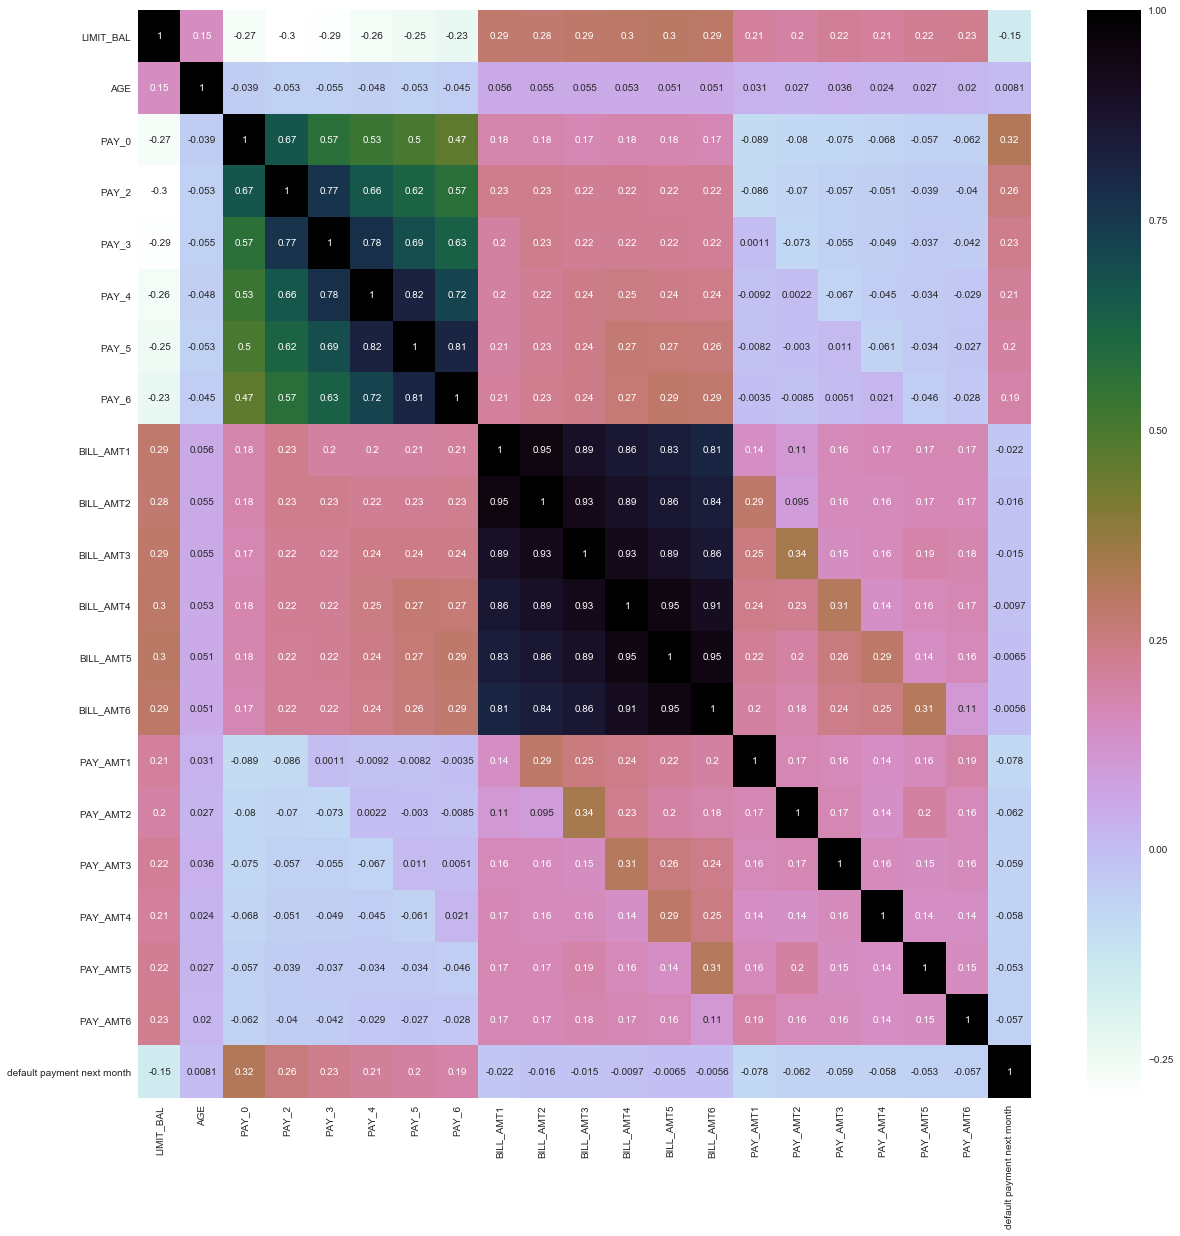

In [29]:
plt.figure(figsize=(20,20)) 
sns.heatmap(train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [30]:
# shape of the data
train.shape

(24000, 24)

In [31]:
train.size

576000

In [32]:
# missing values
train.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
LIMIT_BAL                     24000 non-null int64
SEX                           24000 non-null category
EDUCATION                     24000 non-null category
MARRIAGE                      24000 non-null category
AGE                           24000 non-null int64
PAY_0                         24000 non-null int64
PAY_2                         24000 non-null int64
PAY_3                         24000 non-null int64
PAY_4                         24000 non-null int64
PAY_5                         24000 non-null int64
PAY_6                         24000 non-null int64
BILL_AMT1                     24000 non-null int64
BILL_AMT2                     24000 non-null int64
BILL_AMT3                     24000 non-null int64
BILL_AMT4                     24000 non-null int64
BILL_AMT5                     24000 non-null int64
BILL_AMT6                     24000 non-null int64
PAY_AMT1       

In [34]:
train["EDUCATION"].value_counts()

2    11360
1     8443
3     3850
5      207
4       92
6       37
0       11
Name: EDUCATION, dtype: int64

In [35]:
train.groupby('EDUCATION').count()

LIMIT_BAL    SEX  MARRIAGE    AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
EDUCATION                                                                  
0                 11     11        11     11     11     11     11     11   
1               8443   8443      8443   8443   8443   8443   8443   8443   
2              11360  11360     11360  11360  11360  11360  11360  11360   
3               3850   3850      3850   3850   3850   3850   3850   3850   
4                 92     92        92     92     92     92     92     92   
5                207    207       207    207    207    207    207    207   
6                 37     37        37     37     37     37     37     37   

           PAY_5  PAY_6             ...              BILL_AMT4  BILL_AMT5  \
EDUCATION                           ...                                     
0             11     11             ...                     11         11   
1           8443   8443             ...                   8443       8443   
2          11360  11360             ...                  11360      11360   
3           3850   3850             ...                   3850       3850   
4             92     92             ...                     92         92   
5            207    207             ...                    207        207   
6             37     37             ...                     37         37   

           BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
EDUCATION                                                                
0                 11        11        11        11        11        11   
1               8443      8443      8443      8443      8443      8443   
2              11360     11360     11360     11360     11360     11360   
3               3850      3850      3850      3850      3850      3850   
4                 92        92        92        92        92        92   
5                207       207       207       207       207       207   
6                 37        37        37        37        37        37   

           PAY_AMT6  default payment next month  
EDUCATION                                        
0                11                          11  
1              8443                        8443  
2             11360                       11360  
3              3850                        3850  
4                92                          92  
5               207                         207  
6                37                          37  

[7 rows x 23 columns]

<a id="3"></a> <br>
### 3.B. Data Transformations

In [36]:
# one hot necoded train predictors
ohe_train = pd.get_dummies(train)
ohe_test = pd.get_dummies(test)

In [37]:
ohe_train.shape

(24000, 34)

In [38]:
ohe_test.shape

(6000, 34)

In [39]:
ohe_train.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [40]:
ohe_test.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [41]:
X = ohe_train.drop(['default payment next month'], axis=1)
y = ohe_train['default payment next month']

X_test = ohe_test.drop(['default payment next month'], axis=1)
y_test = ohe_test['default payment next month']

In [42]:
# scale the data/standardize the features
from sklearn.preprocessing import Normalizer

X_scaled = Normalizer().fit_transform(X)
X_test_scaled = Normalizer().fit_transform(X_test)

###### [Go to top](#top)

<a id="4"></a> <br>
## 4. Methodology Overview

My approach depends on these steps:

* Get dummies from factor variables
* Scale train and test sets,
* There is not best model, so I have tried different base models at first,
* Choose the best validation accuracy model,
* Predict the test set with the best model.

###### [Go to top](#top)

<a id="5"></a> <br>
## 5. Model Training/Validation

In [43]:
# train, validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled ,y , test_size=.20, random_state=1903)

In [44]:
MLA = [
    ##Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    ##Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    ##GLM
    linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),
    
    ##Navies Bayes
    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),
    
    ##Nearest Neighbor
    #neighbors.KNeighborsClassifier(),
    
    ##SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    ##Trees    
    tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),
    
    ]

In [45]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_val)
    print(alg)
    fp, tp, th = roc_curve(y_val, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Val Accuracy'] = round(alg.score(X_val, y_val), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_val, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_val, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept

###### [Go to top](#top)

<a id="6"></a> <br>
## 6. Results


In [46]:
MLA_compare.sort_values(by = ['MLA Val Accuracy'], ascending = False, inplace = True)    
MLA_compare

MLA Name  MLA Train Accuracy  MLA Val Accuracy  \
0  GradientBoostingClassifier              0.8217            0.8117   
1      RandomForestClassifier              0.9796            0.7927   
3           RidgeClassifierCV              0.7782            0.7683   
2        LogisticRegressionCV              0.7789            0.7677   
4      DecisionTreeClassifier              0.9995            0.7138   

   MLA Precission  MLA Recall   MLA AUC  
0        0.671617    0.366007  0.656024  
1        0.611855    0.287770  0.616363  
3        0.000000    0.000000  0.500000  
2        0.468085    0.019784  0.506503  
4        0.385490    0.396583  0.602982

* Among our 5 models, Gradient Boosting Classifier algorithm is the best one to predict the test set.

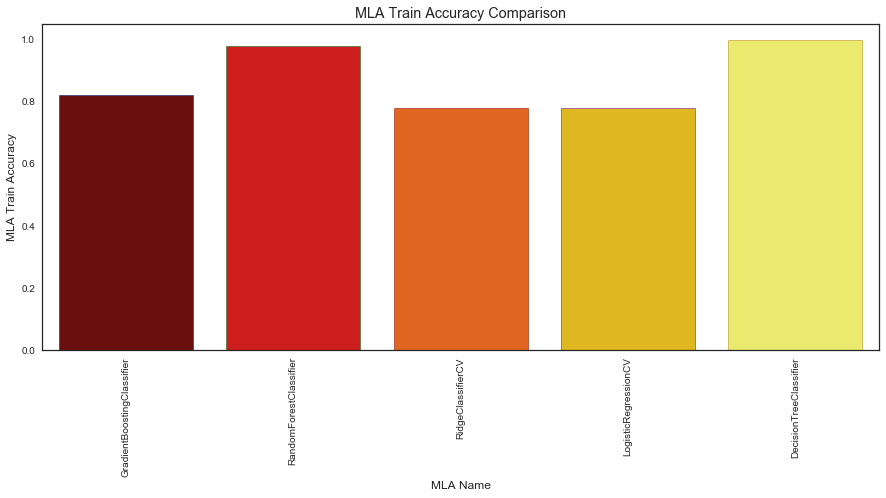

In [47]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

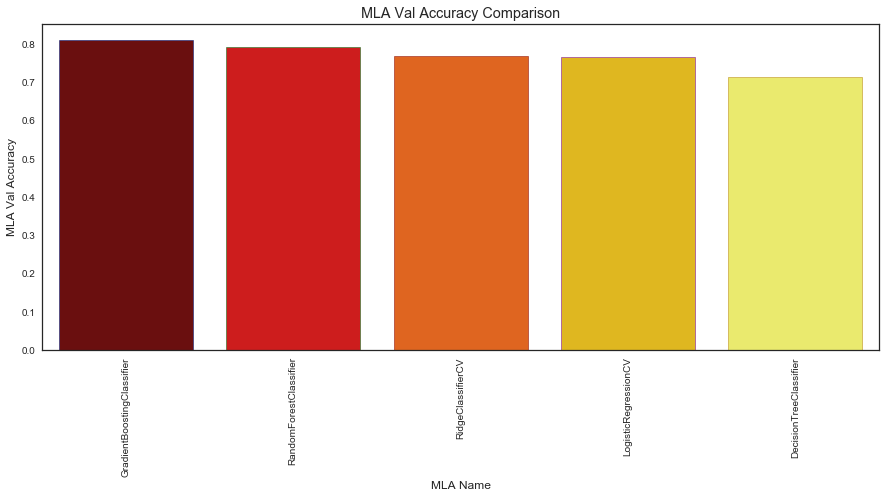

In [48]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Val Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Val Accuracy Comparison')
plt.show()

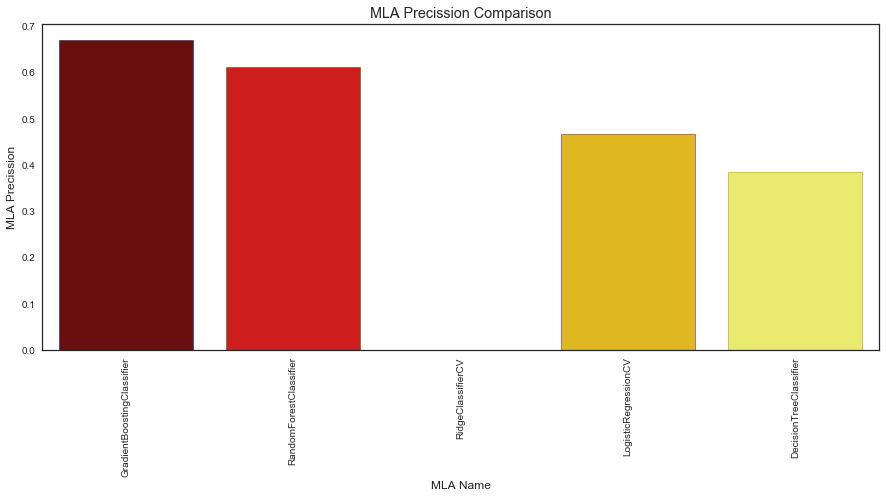

In [49]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

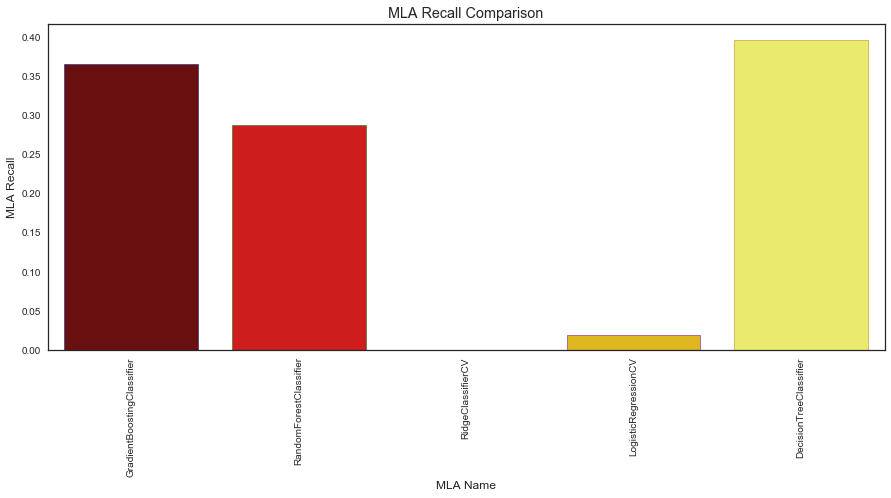

In [50]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

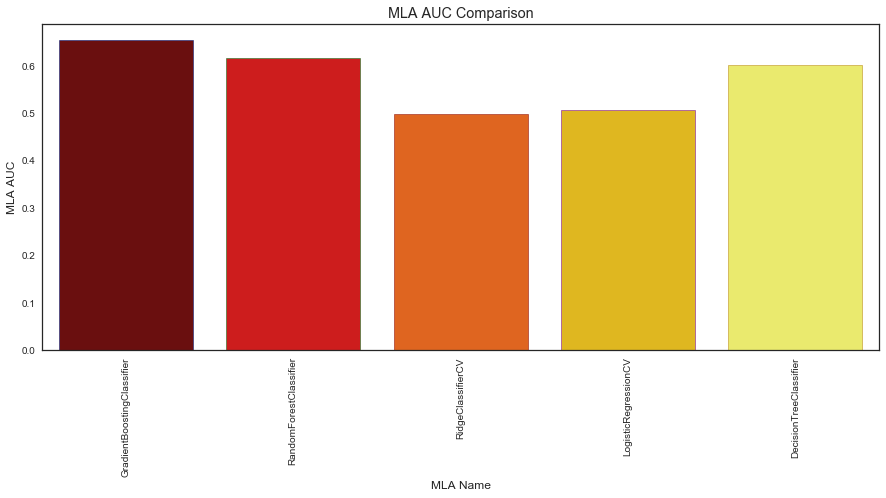

In [51]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

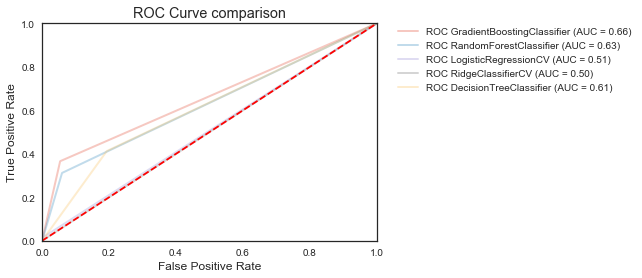

In [52]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_val)
    fp, tp, th = roc_curve(y_val, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [58]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [61]:
#clf = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

#clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('AFTER tuning Parameters: ', clf.best_params_)
print("AFTER tuning Training w/bin set score: {:.2f}". format(clf.score(X_train, y_train))) 
print("AFTER tuning Val w/bin set score: {:.2f}". format(tune_model.score(X_val, y_val)))
print('-'*10)

###### [Go to top](#top)

<a id="7"></a> <br>
## 7. Final Predictions on Test Set

In [57]:
final_predictions = ensemble.GradientBoostingClassifier().fit(X_train, y_train).predict(X_test)

<a id="8"></a> <br>

***References:***

https://www.kaggle.com/aldemuro/comparing-ml-algorithms-train-accuracy-90

https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv

https://scikit-learn.org/stable/index.html

https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python

###### [Go to top](#top)